# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

### ¿Cómo se garantiza existencia de la factorización  𝐿𝑈?  

Queremos probar que teniendo una matriz $A = I - pWD$ , ésta admite descomposicion LU, si A es diagonal dominante.

Se dice que una matriz cuadrada es *diagonal dominante* (por filas) si el valor absoluto de la entrada en la diagonal principal de una fila es mayor o igual a la suma de los valores absolutos de todas las demás entradas (no diagonales) de esa fila.

W es aquella matriz que se construye estableciendo wij = 1 si la página j tiene un link a la página i y $w_{ij}$ = 0 en caso contrario.
Además $w_{ii} \neq 0$  pues ignoramos los autolinks.
Tomamos W $\in \mathbb{R}^{3 \times 3}$.

<div style="text-align:center">
\( W = 
\begin{pmatrix}
0 & a & b \\
c & 0 & d \\
e & f & 0
\end{pmatrix} \)
</div>

Luego, D es una matriz diagonal con elementos $d_{jj}$ de la forma:

\begin{equation}
  d_{jj} = \left\lbrace
  \begin{array}{ll}
    \frac{1}{c_j} & \text{si } c_j \neq 0\\
    0 & \text{si } c_j = 0
  \end{array}
  \right.
\end{equation}

El termino $-pWD$, nos da como resultado una matriz con ceros en la diagonal.


<div style="text-align:center">
\(-pWD = 
\begin{pmatrix}
    0 & -pah & -pbi\\
    -pcg & 0 & -pdi\\
    -peg & -pfg & 0
  \end{pmatrix} \)
</div>

A esta matriz se le debe sumar la identidad y aplicarle modulo. Vemos que se obtiene:


<div style="text-align:center">
\(|I-pWD| = 
\begin{pmatrix}
    1 & |pah| & |pbi|\\
    |pcg| & 1 & |pdi|\\
    |peg & |pfg| & 1
  \end{pmatrix} \)
</div>

Observemos los términos fuera de la diagonal. Tomemos ∣𝑝𝑎ℎ∣ como representante:
\begin{equation}
    |1| \geq  |p*a*h|
\end{equation}

Recordemos que $ p\in (0,1)$, y $a$ y $h \in [0,1]$. Como $0<p<1$,  $0 \leqslant a,h \leqslant 1$, pah no puede ser mayor a 1

Debido a que 𝐴 es una matriz diagonal dominante, existe su descomposición LU.

### ¿ La matriz  (𝐈−𝑝 𝐖 𝐃) está bien condicionada? ¿Cómo influye el valor de  𝑝?

Notemos que cond(A) = (𝐈−𝑝 𝐖 𝐃)

Cuando p tienda a 0, $pWD$ tendera a cero, por lo que:

$cond(A)$ $\approx (I)$ $\Longrightarrow$ $cond(A)$ tiende a 1

Que pasa cuando p tiende a 1? Cuanto mas grande es el p, se le da mayor importancia a las conexiones entre nodos. En cambio, cuanto menor el p, la componente aleatoria tiene mayor peso.

Probamos experimentalmente que ocurre cuando p tiende a 1, para la matriz de del test_dosestrellas y vemos que $cond(A)$ se hace cada vez mayor. 

En la diagonal principal tendremos valores que tienden a cero, y por fuera de ella valores > 0. Como las filas suman 0, son linealmente dependientes

Inmediatamente a continuacion, se representa graficamente la variacion del número de condicion para la matriz 'test_dosestrellas' en funcion del valor p

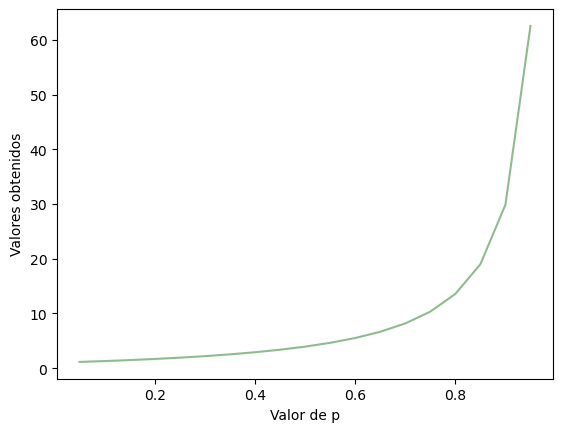

In [15]:
experimento_cond(DS)

---

## Implementación

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

In [19]:
from funciones import *

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
BIEN! - Paso correctamente el test unitario
**************************************************


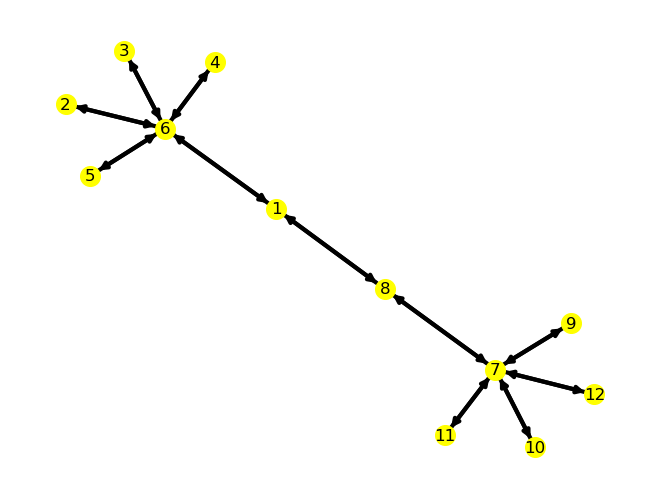

In [16]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)
# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    compara = obtenerMaximoRankingScore(W, p)
    assert(np.isclose(compara, 0.1811, atol= 0.0001))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas: 

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas? 
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


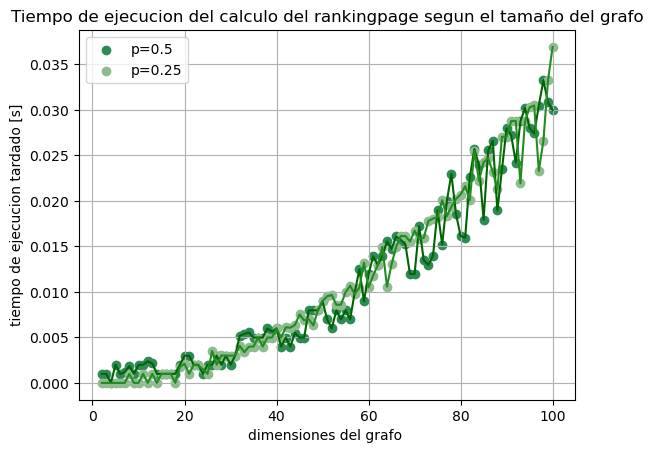

In [10]:
graf_tiempo_tamaño()

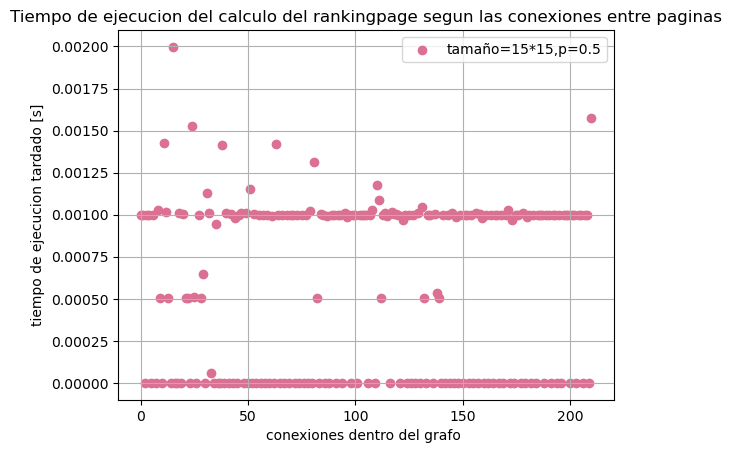

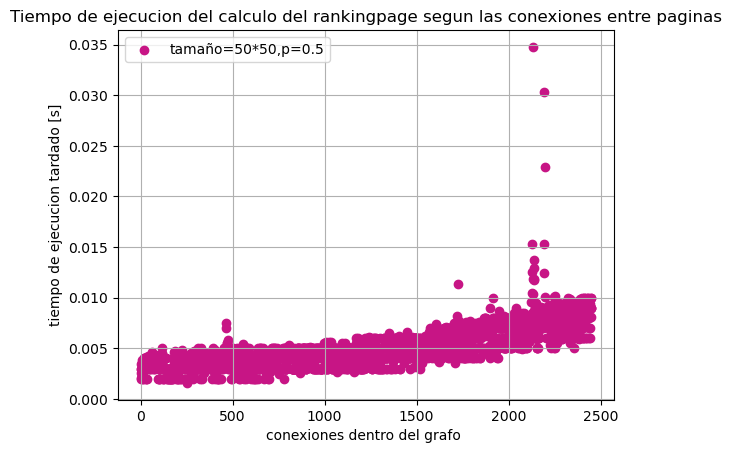

In [11]:
graf_tiemo_densidad()
graf_tiemo_densidad2()

# Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


Para este analisis y teniendo en consideracion que los resultados no variaron en gran manera para cada test, se decidio tomar el test dos estrellas e instagram.

## Dos estrellas
En esta seccion se observa el dibujo de grafo y las paginas mejor rankeadas segun el p. Podemos observar que las paginas 5 y 6 son las mas rankeadas. El 51.7% de las veces la pagina 5 fue mejor rankeada 

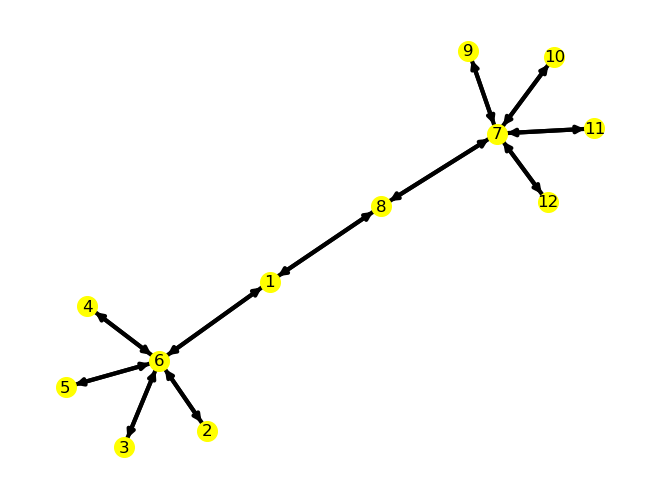

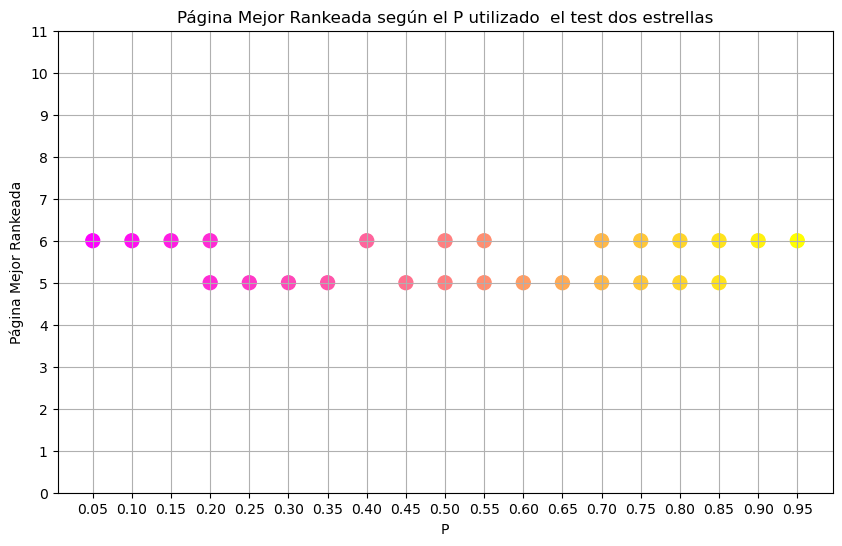

In [22]:
## poner grafo y scatter y torta de dos estrellas y otro
dibujarGrafo(DS, print_ejes= False)
graf_rankingP2(DS, 'dos estrellas')


### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta: 

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.

